In [1]:
import itertools
import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn import preprocessing, datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, silhouette_samples, calinski_harabaz_score
from sklearn.model_selection import train_test_split
from sklearn import mixture
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA, FastICA, NMF, IncrementalPCA, FactorAnalysis, SparsePCA, TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection


**<font color=black size=5>Load Data</font>**

In [2]:
# sklearn_data = datasets.load_breast_cancer()
sklearn_data = datasets.load_digits()
# sklearn_data = datasets.load_diabetes()
# print(sklearn_data.DESCR)

x, y = sklearn_data.data, sklearn_data.target
x = preprocessing.scale(x) 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1997)

# print(sklearn_data.data.shape)
# print(x.shape,y.shape)

**<font color=black size=5>k-mean</font>**

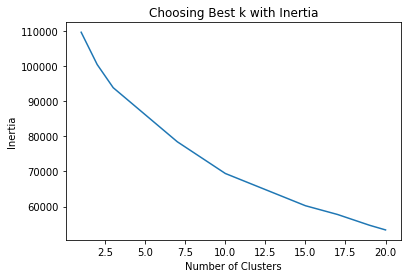

In [3]:
def K_Means_inertia_analysis(X):
    cluster_range = [1, 2, 3, 7, 10, 15, 17, 19, 20]

    inertia_arr = []
    for num_cluster in cluster_range:
        clusterer = KMeans(n_clusters=num_cluster, random_state=10)
        cluster_labels = clusterer.fit(X)
        inertia_arr.append(clusterer.inertia_)
    inertia_arr = np.array(inertia_arr)

    plt.plot([1, 2, 3, 7, 10, 15, 17, 19, 20],inertia_arr)

    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Choosing Best k with Inertia')
    plt.show()
K_Means_inertia_analysis(x)

For n_clusters = 10 The average silhouette_score is : 0.1471173644943271


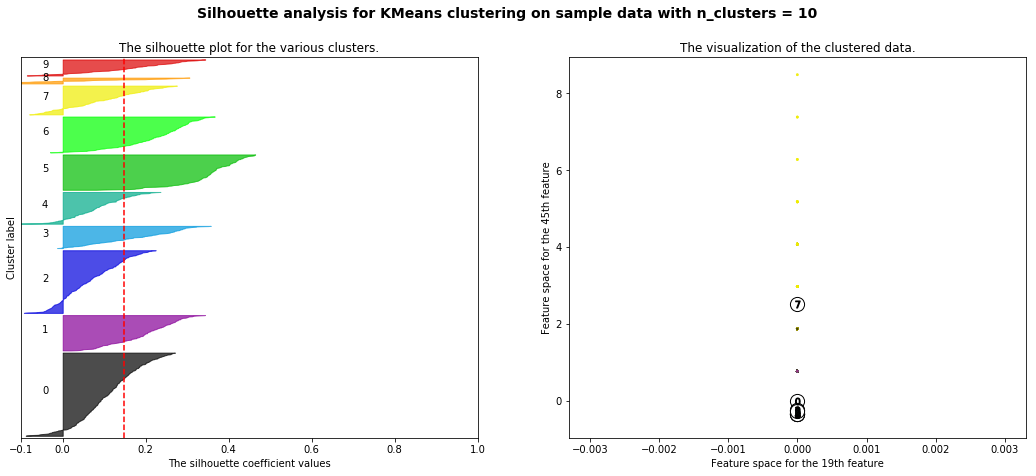

In [44]:
def K_Means_silhouette_analysis(X,y):
#     range_n_clusters = [3, 7, 10, 15, 17, 19, 20]

    range_n_clusters = [10]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#         ax2.scatter(X[:, 18], X[:, 45], marker='.', s=30, lw=0, alpha=0.7,
#                     c=colors, edgecolor='k')
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
#         ax2.scatter(centers[:, 18], centers[:, 45], marker='o',
#                     c="white", alpha=1, s=200, edgecolor='k')
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
#             ax2.scatter(c[18], c[45], marker='$%d$' % i, alpha=1,
#                         s=50, edgecolor='k')
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')


        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 19th feature")
        ax2.set_ylabel("Feature space for the 45th feature")
#         ax2.set_xlabel("Feature space for the 1st feature")
#         ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()
K_Means_silhouette_analysis(x,y)

For n_clusters = 10 The average silhouette_score is : 0.1471173644943271


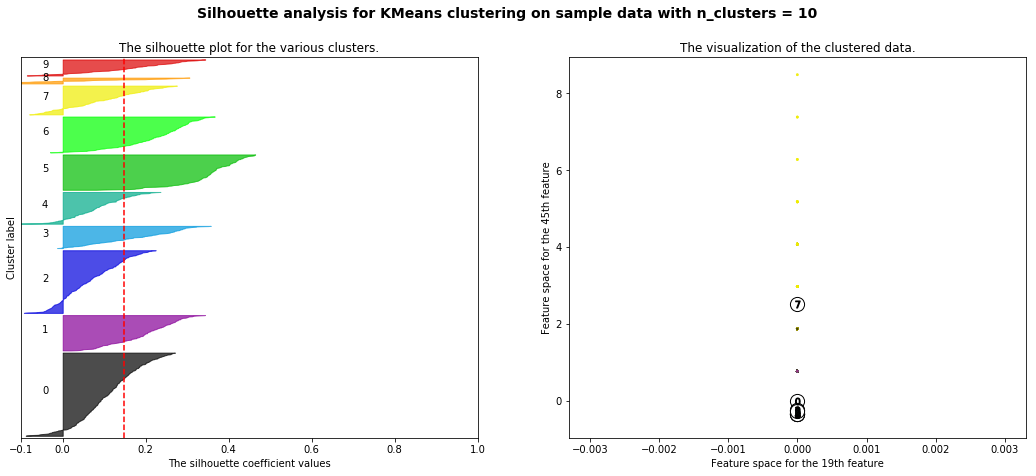

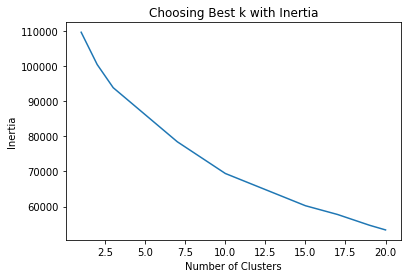

K-Means Inertia:  78212.28020197955
K-Means Silhouette score:  0.11834550915214295
K-Means Adjusted Mutual Information (AMI) score:  0.5424438202665446



In [45]:
def K_Means_Results(best_n,X,y):
    kmeans = KMeans(n_clusters=best_n, random_state=1997)
    kmeans.fit(X)
    print('K-Means Inertia: ', kmeans.inertia_)
    silh_result = silhouette_score(X, kmeans.labels_)
    print('K-Means Silhouette score: ', silh_result)
    AMI = adjusted_mutual_info_score(y, kmeans.labels_)
    print('K-Means Adjusted Mutual Information (AMI) score: ', AMI)
    print()
#     print(y)
#     print(kmeans.labels_)
    return kmeans.fit_transform(X)

K_Means_silhouette_analysis(x,y)
K_Means_inertia_analysis(x)

K_Clustered_X = K_Means_Results(7,x,y)


**<font color=black size=5>GMM_EM</font>**

In [ ]:
def gmm_em(X,y):
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 20)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type='full')
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm

    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                  'darkorange', 'green'])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    plt.figure(figsize=(8, 6))
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                      (i + 1) * len(n_components_range)],
                            width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    best_num = np.mod(bic.argmin(), len(n_components_range)) + 1
    print(best_num)
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

    # Plot the winner
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)
    print(clf.covariances_.shape)
    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                               color_iter)):
        print(cov.shape)
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 18], X[Y_ == i, 45], .8, color=color)
#         plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)


        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())

    plt.title('Selected GMM: full model,' + str(best_num) + ' components')

    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()
    return best_num
# gmm_em(x,y)

In [ ]:
def gmm_results(best_n,X,y):
    gmm_best = GaussianMixture(n_components=best_n, random_state=1997)
    gmm_best.fit(X)
    gmm_labels = gmm_best.predict(X)

    print('GMM BIC: ', gmm_best.bic(X))
    score_gmm = silhouette_score(X, gmm_labels)
    print('GMM Silhouette score: ', score_gmm)
    AMI_gmm = adjusted_mutual_info_score(y, gmm_labels)
    print('GMM Adjusted Mutual Information (AMI) score: ', AMI_gmm)
    print()
    return gmm_best.predict_proba(X)

best_gmm_n = gmm_em(x,y)
GMM_Clustered_X = gmm_results(best_gmm_n,x,y)

In [ ]:
def gmm_el(X,y):
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 20)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type='full')
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm

    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                  'darkorange','pink','green','purple'])
    clf = best_gmm
    bars = []

    best_num = np.mod(bic.argmin(), len(n_components_range)) + 1

    # Plot the winner
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)
    print(clf.covariances_.shape)
    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                               color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)
#         plt.scatter(X[Y_ == i, 18], X[Y_ == i, 45], .8, color=color)


        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title('Selected GMM: full model,' + str(best_num) + ' components')
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()
    return best_num

# gmm_el(x,y)

For n_clusters = 10 The average silhouette_score is : 0.2793328763792789


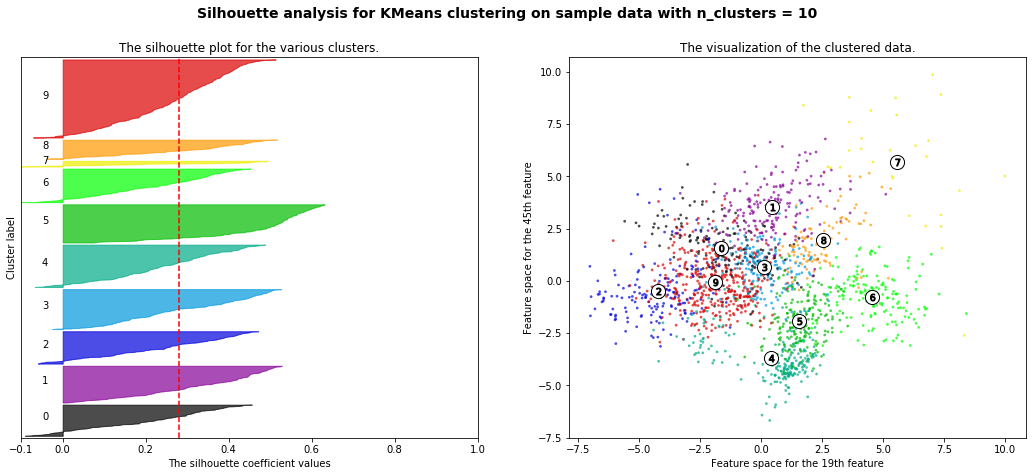

K-Means Inertia:  19353.477821572214
K-Means Silhouette score:  0.28571187038444956
K-Means Adjusted Mutual Information (AMI) score:  0.6106122672569135



array([[ 5.69052436,  7.26034745,  6.10750211, ..., 11.88512176,
         8.02191983,  6.72337446],
       [ 6.97455891,  6.35816793,  6.19339419, ..., 13.51915817,
         2.68914616,  6.72061187],
       [ 6.62951359,  7.77032707,  5.30536669, ..., 13.24135419,
         2.56597392,  5.90417881],
       ...,
       [ 5.58066682,  5.52557993,  4.22809427, ..., 12.64461581,
         1.39966756,  4.75024848],
       [ 3.2288631 ,  6.23548493,  5.80502925, ..., 11.96222291,
         6.06301574,  5.56856838],
       [ 4.46926752,  6.33461744,  6.60203591, ..., 13.79885301,
         4.86074266,  5.10977954]])

In [58]:
best_n = 7

best_X = PCA(n_components = best_n).fit_transform(x)

K_Means_silhouette_analysis(best_X,y)
# K_Means_inertia_analysis(best_X)
K_Means_Results(10,best_X,y)


# best_gmm_n = gmm_em(best_X,y)
# # # print(best_gmm_n)
# GMM_Clustered_X = gmm_results(best_gmm_n,best_X,y)

# best_gmm_n = gmm_el(best_X,y)


For n_clusters = 10 The average silhouette_score is : 0.29583603443207435


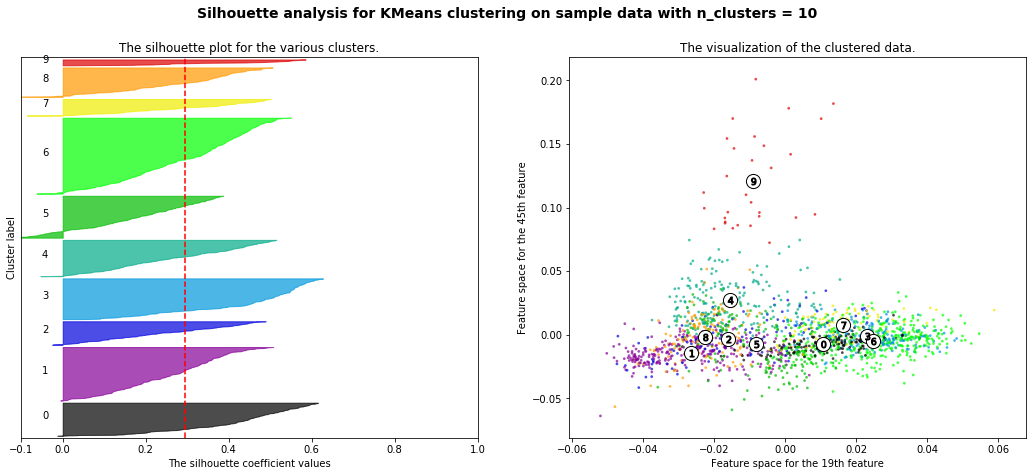

K-Means Inertia:  1.5274739077578974
K-Means Silhouette score:  0.2958454894842959
K-Means Adjusted Mutual Information (AMI) score:  0.5260061855258589



array([[0.10598905, 0.083343  , 0.05672816, ..., 0.07694801, 0.05879532,
        0.0643255 ],
       [0.07536053, 0.03809467, 0.06877503, ..., 0.02824997, 0.06079008,
        0.05902483],
       [0.08428561, 0.03115451, 0.06624964, ..., 0.03472547, 0.05525889,
        0.06711106],
       ...,
       [0.07324369, 0.03752708, 0.05645259, ..., 0.01977091, 0.04153522,
        0.05113744],
       [0.07724771, 0.05022158, 0.02820024, ..., 0.05964048, 0.05937214,
        0.0474297 ],
       [0.07682619, 0.05756816, 0.04062927, ..., 0.04005449, 0.05663408,
        0.06670244]])

In [51]:
best_n = 5

best_X = FastICA(n_components = best_n).fit_transform(x)

K_Means_silhouette_analysis(best_X,y)
# K_Means_inertia_analysis(best_X)
K_Means_Results(10,best_X,y)

# best_gmm_n = gmm_em(best_X,y)
# print(best_gmm_n)
# GMM_Clustered_X = gmm_results(best_gmm_n,best_X,y)

# best_gmm_n = gmm_el(best_X,y)


For n_clusters = 7 The average silhouette_score is : 0.1636166793684719


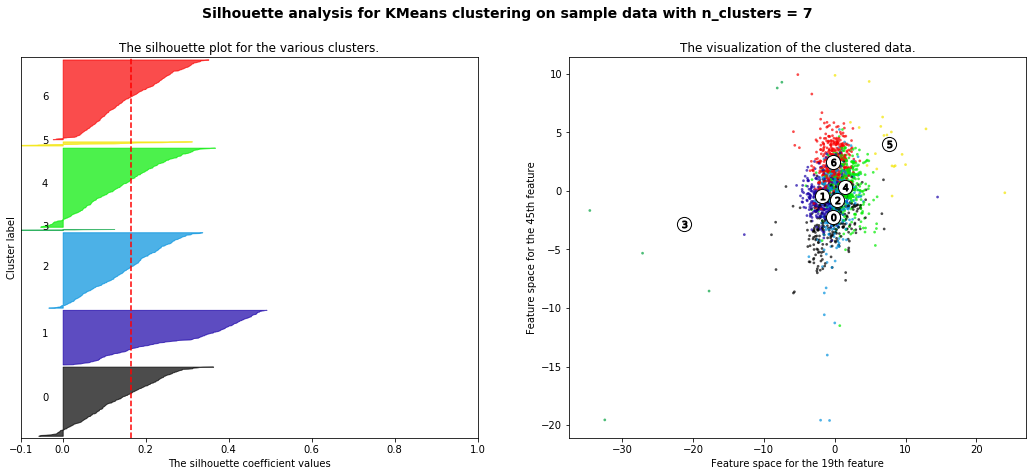

K-Means Inertia:  63220.97919486142
K-Means Silhouette score:  0.15758218135970387
K-Means Adjusted Mutual Information (AMI) score:  0.32991845314360724



array([[ 3.1105272 , 10.53567593, 10.01073665, ..., 13.05224225,
        19.0001288 ,  7.05887802],
       [10.17039458,  9.83469781,  7.99440989, ...,  5.40836519,
        17.6971237 ,  9.80560418],
       [10.04628967,  7.68942029,  8.23665982, ...,  6.26173243,
        18.81681493, 10.50773574],
       ...,
       [11.04463682, 11.97520046, 10.40497508, ...,  8.33926978,
        17.01776276, 11.22007096],
       [ 5.63459856, 12.47025396, 10.60944432, ..., 12.66964652,
        16.34932995,  8.09554271],
       [ 8.8047339 ,  7.76591057,  5.95721823, ...,  7.06458653,
        15.62220534,  7.92508583]])

In [38]:
best_n = 10

best_X = GaussianRandomProjection(n_components = best_n).fit_transform(x)

K_Means_silhouette_analysis(best_X,y)
# K_Means_inertia_analysis(best_X)
K_Means_Results(7,best_X,y)

# best_gmm_n = gmm_em(best_X,y)
# print(best_gmm_n)
# GMM_Clustered_X = gmm_results(best_gmm_n,best_X,y)

# best_gmm_n = gmm_el(best_X,y)

# GMM_Clustered_X = gmm_results(best_gmm_n,best_X,y)


For n_clusters = 7 The average silhouette_score is : 0.40759337874807205


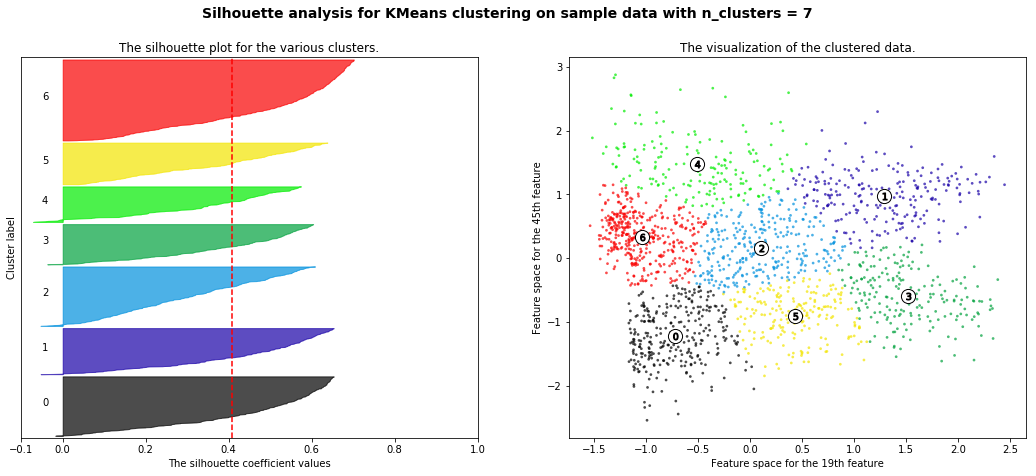

K-Means Inertia:  498.2645933165385
K-Means Silhouette score:  0.4059982436892214
K-Means Adjusted Mutual Information (AMI) score:  0.30743374365486065



array([[1.81577349, 1.28426305, 1.66768741, ..., 0.97024564, 1.29405309,
        1.50705301],
       [2.61048848, 1.41760801, 1.40268336, ..., 0.18799707, 1.74834502,
        2.42180975],
       [2.58589837, 1.96737734, 0.89704064, ..., 0.73473355, 1.55940243,
        2.73122137],
       ...,
       [2.35013875, 1.41131946, 1.32367172, ..., 0.37973464, 1.51594956,
        2.20422598],
       [1.93932953, 1.75357215, 1.02632762, ..., 0.86198012, 1.03448027,
        2.08891866],
       [0.87854386, 2.68163607, 1.43630511, ..., 2.10202207, 0.26942607,
        1.97654683]])

In [19]:
best_n = 2
best_X = FactorAnalysis(n_components = best_n).fit_transform(x)

K_Means_silhouette_analysis(best_X,y)
# K_Means_inertia_analysis(best_X)
K_Means_Results(7,best_X,y)

# best_gmm_n = gmm_em(best_X,y)
# print(best_gmm_n)
# GMM_Clustered_X = gmm_results(best_gmm_n,best_X,y)

# best_gmm_n = gmm_el(best_X,y)


For n_clusters = 10 The average silhouette_score is : 0.1471173644943271


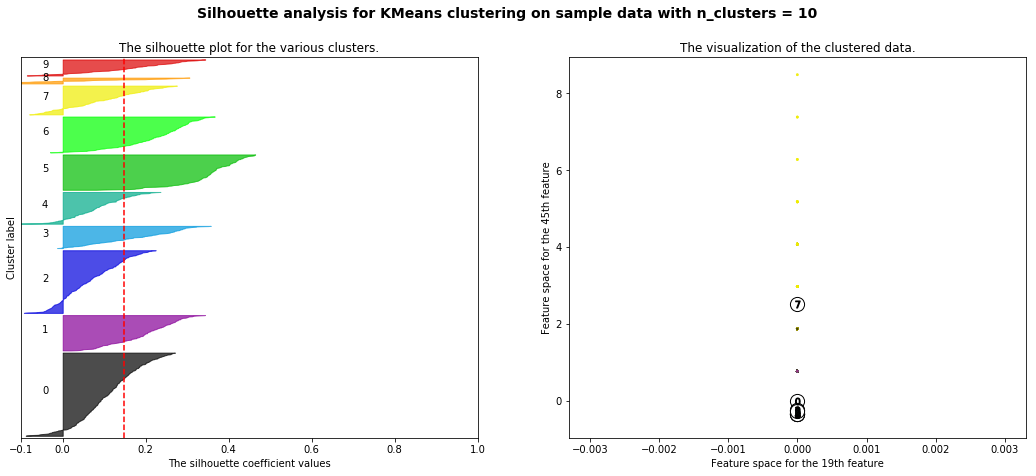

K-Means Inertia:  69480.80041526949
K-Means Silhouette score:  0.14349671276423218
K-Means Adjusted Mutual Information (AMI) score:  0.6033979595794918



array([[ 8.67195328,  7.98005949,  6.68769576, ...,  7.98851618,
        13.17402349,  7.43493221],
       [ 6.59633548,  8.10544182,  7.914311  , ...,  7.63299739,
        14.18841366,  7.67407993],
       [ 7.53360259,  8.42672419,  9.02378238, ...,  8.53265113,
        14.91102067,  8.37158241],
       ...,
       [ 7.39705771,  7.09950824,  7.48949311, ...,  7.70782399,
        13.89135764,  7.40290951],
       [ 6.58858364,  7.63276655,  5.6502671 , ...,  7.8700133 ,
        13.28983067,  7.98513175],
       [ 9.60510373,  7.57350604,  7.16121469, ...,  9.49011945,
        15.51266961,  9.21361089]])

In [52]:
# best_n = 2

best_X = x

K_Means_silhouette_analysis(best_X,y)
# K_Means_inertia_analysis(best_X)
K_Means_Results(10,best_X,y)


# best_gmm_n = gmm_em(best_X,y)
# print(best_gmm_n)
# GMM_Clustered_X = gmm_results(best_gmm_n,best_X,y)

# best_gmm_n = gmm_el(best_X,y)

In [ ]:
GMM_Clustered_X = gmm_results(4,best_X,y)
